In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from vpt.common import *
import vpt.settings as s
import vpt.utils.image_processing as ip
import vpt.hand_detection.depth_context_features as dcf
import vpt.hand_detection.depth_image_features as dif
s.sensor = "realsense"
%matplotlib inline

In [ ]:
dmap = load_depthmap("data/posture/p4/p4a/000175.bin")
dmap = background_sub(dmap)
dmap[dmap<600] = 0
dmap_disp = (ip.normalize2(dmap)*255).astype('uint8')

pixel = (135, 235)

In [ ]:
offsets_dcf1 = dcf.generate_feature_offsets(M=4, radius=.15)
offsets_dcf2 = dcf.generate_feature_offsets(M=5, radius=.2)
offsets_dcf3 = dcf.generate_feature_offsets(M=5, radius=.15)

In [ ]:
_, dcf_pixels1 = dcf.calc_features(dmap, offsets_dcf1)

dcf_pixels1 = dcf_pixels1.reshape(192, 480, len(offsets_dcf1), 2)
pixel_offsets1 = dcf_pixels1[pixel]
idxs = np.all(pixel_offsets1 != -1, axis=1)
offset_x1 = pixel_offsets1[:, 0]
offset_y1 = pixel_offsets1[:, 1]
offset_x1 = offset_x1[idxs]
offset_y1 = offset_y1[idxs]

_, dcf_pixels2 = dcf.calc_features(dmap, offsets_dcf2)

dcf_pixels2 = dcf_pixels2.reshape(192, 480, len(offsets_dcf2), 2)
pixel_offsets2 = dcf_pixels2[pixel]
idxs = np.all(pixel_offsets2 != -1, axis=1)
offset_x2 = pixel_offsets2[:, 0]
offset_y2 = pixel_offsets2[:, 1]
offset_x2 = offset_x2[idxs]
offset_y2 = offset_y2[idxs]

_, dcf_pixels3 = dcf.calc_features(dmap, offsets_dcf3)

dcf_pixels3 = dcf_pixels3.reshape(192, 480, len(offsets_dcf3), 2)
pixel_offsets3 = dcf_pixels3[pixel]
idxs = np.all(pixel_offsets3 != -1, axis=1)
offset_x3 = pixel_offsets3[:, 0]
offset_y3 = pixel_offsets3[:, 1]
offset_x3 = offset_x3[idxs]
offset_y3 = offset_y3[idxs]

In [ ]:
# plt.figure(figsize=(24,12))

# plt.subplot(221)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# # plt.tight_layout()

# plt.subplot(222)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x1, offset_y1, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-4_15.jpg")

# plt.subplot(223)
axes = plt.gca()
axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.scatter(offset_x3, offset_y3, c='white', s=15)
plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='*')
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-5_15.jpg")

# plt.subplot(224)
# axes = plt.gca()
# axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x2, offset_y2, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-5_20.jpg")
# plt.savefig("feature_offsets.pdf")

In [ ]:
offsets_dif = dif.generate_feature_offsets(n_offsets=100, radius=25000)

In [ ]:
_, pixels_u, pixels_v = dif.calc_features(dmap, offsets_dif)
pixels_u = pixels_u.reshape(192, 480, len(offsets_dif[1]), 2)
pixels_v = pixels_v.reshape(192, 480, len(offsets_dif[1]), 2)

In [ ]:
idxs_u = np.all(pixels_u[pixel] != -1, axis=1)
idxs_v = np.all(pixels_v[pixel] != -1, axis=1)
print(idxs_u.shape)
print(idxs_v.shape)

In [ ]:
pixel2 = (pixel[0]-30, pixel[1]+50)
n_disp = 20

markers = ['v', 's', 'o', '^'] * 5

# plt.figure(figsize=(24, 12))
# plt.subplot(121)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")

for i, m in enumerate(markers):
    plt.scatter(pixels_u[pixel][idxs_u][i, 1], pixels_u[pixel][idxs_u][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixels_v[pixel][idxs_v][i, 1], pixels_v[pixel][idxs_v][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixel[1], pixel[0], c="black", s=20, marker="x")

plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dif-features.jpg")

# plt.subplot(122)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=.8)
# plt.scatter(pixels_u[pixel2][idxs_u][:n_disp, 1], pixels_u[pixel2][idxs_u][:n_disp, 0], c=cs, s=50, marker="o")
# plt.scatter(pixels_v[pixel2][idxs_v][:n_disp, 1], pixels_v[pixel2][idxs_v][:n_disp, 0], c=cs, s=50, marker='o')
# plt.scatter(pixel2[1], pixel2[0], c='red', s=30, marker="s")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("kinect_offsets.pdf")

In [ ]:
data = np.load("data/rdf/testing/p4/000010.npz")
dmap_rdf_disp = data["dmap"]
dmap_rdf_disp = background_sub(dmap_rdf_disp)
dmap_rdf_disp[dmap_rdf_disp==0]=1500
dmap_rdf_disp[dmap_rdf_disp<550]=1500
dmap_rdf_disp[dmap_rdf_disp==1500]=0
dmap_rdf_disp = ip.normalize2(dmap_rdf_disp)

mask_disp = cv2.cvtColor(data["mask"], cv2.COLOR_RGB2GRAY)

In [ ]:
offset_gen = dcf.generate_feature_offsets
feature_gen = dcf.calc_features
M = 7
radius = .2
n_samples = 750
base_model_folder = "data/rdf/trainedmodels/"
seg_model_path = os.path.join(base_model_folder, "{:s}_M{:d}_rad{:0.2f}".format("mixed_no_{}".format("p3"), M, radius))

rdf_hs = load_hs_model("Testing", offset_gen, feature_gen, M, radius, n_samples, n_jobs=1, refresh=False, segmentation_model_path=seg_model_path, ms=None, combined=False)

In [ ]:
mask_pred = rdf_hs.generate_mask(data["dmap"])
mask_pred = cv2.cvtColor(mask_pred, cv2.COLOR_RGB2GRAY)

In [ ]:
# plt.figure(figsize=(24,12))
# plt.subplot(221)
plt.imshow(dmap_rdf_disp, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-dmap.jpg")

# plt.subplot(222)
# plt.imshow(mask_disp, cmap="gray")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("dmap-norm.pdf")

# plt.subplot(224)
# plt.imshow(mask_pred, cmap="gray")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # # plt.tight_layout()

In [8]:
dcf_results = np.load("rdf_dcf_results_02_07.npz")
dif_results = np.load("rdf_dif_results-02-19.npz")

In [9]:
dcf_acc = dcf_results["accuracy"]
dcf_f_score = dcf_results["f_score"]
dif_acc = dif_results["accuracy"]
dif_f_score = dif_results["f_score"]

In [10]:
print(dcf_acc)
print(dif_acc)

[[ 0.97380242  0.97483913  0.97647745  0.97561164]
 [ 0.97521785  0.97463484  0.97648518  0.97724583]
 [ 0.97526715  0.97680829  0.97554652  0.97733891]
 [ 0.97536349  0.97376955  0.97515583  0.97677227]
 [ 0.97476133  0.97683016  0.97687758  0.97670051]
 [ 0.97537293  0.97657076  0.97631205  0.97694403]
 [ 0.97628816  0.97650247  0.97660075  0.97693031]
 [ 0.97581817  0.97512543  0.97613146  0.97598951]
 [ 0.97398767  0.97576982  0.97622473  0.97664916]]
[[ 0.96730955  0.96789974  0.96959084  0.96975861]
 [ 0.97163448  0.97212288  0.97333687  0.97396764]
 [ 0.97188991  0.97277736  0.97287271  0.97448726]
 [ 0.97229248  0.97302816  0.9743765   0.97478492]
 [ 0.97226919  0.97381683  0.97373372  0.97444944]
 [ 0.97114196  0.97216391  0.97234552  0.97267639]
 [ 0.97039336  0.97196335  0.97162519  0.97230602]
 [ 0.96948648  0.97057492  0.97170617  0.97090349]
 [ 0.96995142  0.96983541  0.97087516  0.97143851]]


[  25.      40.625   56.25    71.875   87.5    103.125  118.75   134.375
  150.   ]


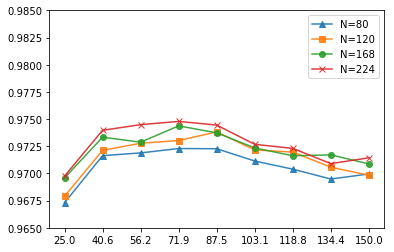

In [31]:
x_vals = np.linspace(25, 150, 9)
print(x_vals)

markers = ["^", "s", "o", "x"]

axes = plt.gca()
axes.set_ylim([.965,.985])
axes.set_xticks(x_vals)
for i, m in enumerate(markers):
    plt.plot(x_vals, dif_acc[:,i], marker=m, alpha=.9)
plt.legend(['N=80', 'N=120', 'N=168', 'N=224'])
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-dif-results.jpg")

[ 0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275  0.3  ]


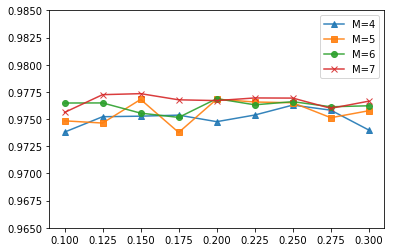

In [32]:
x_vals = np.linspace(.1, .3, 9)
print(x_vals)


axes = plt.gca()
axes.set_ylim([.965,.985])
axes.set_xticks(x_vals)
markers = ["^", "s", "o", "x"]
for i, m in enumerate(markers):
    plt.plot(x_vals, dcf_acc[:,i], marker=m, alpha=.9)
plt.legend(['M=4', 'M=5', 'M=6', 'M=7'])
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-dcf-results.jpg")

In [33]:
fnames = np.load("data/rdf/training-rand/p1/filenames.npy")

In [36]:
fnames[51:102]

array(['data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p1a/000243.bin', 'data/posture/p1/p1a/000243.bin',
       'data/posture/p1/p